In [1]:
import sys
sys.path.insert(0, "/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch")

[0.548364846401605]


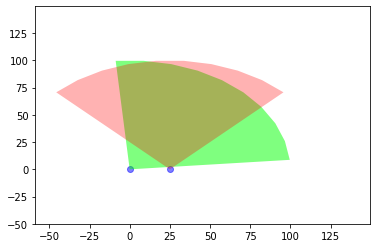

In [2]:
import torchvision.transforms as transforms
from cirtorch.datasets.traindataset import TuplesDataset
from cirtorch.utils.view_angle import field_of_view, ious, plot_fov

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from os.path import join
import torch
from PIL import Image

In [4]:
#N = np.shape(train_dataset.qpool)[0]

default_cities = {
    'train': ["london", "zurich", "boston", "melbourne", "amsterdam","helsinki",
              "tokyo","toronto","saopaulo","moscow","trondheim","paris","bangkok",
              "budapest","austin","berlin","ottawa","phoenix","goa","amman","nairobi","manila"],
    'val': ["cph", "sf"],
    'test': ["miami","athens","buenosaires","stockholm","bengaluru","kampala"]
}
root = '/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images' #data

In [77]:
for city in default_cities['train']:
    data = {}

    train_dataset = TuplesDataset(
        name='mapillary',
        mode='train',
        qsize=float('Inf'),
        poolsize=float('Inf'),
        posDistThr=25,
        negDistThr=50, 
        root_dir = '/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images',#'data',
        cities=city,
    )

    for i, qIdx in enumerate(train_dataset.qpool):
        # qID from qIdx
        qId = train_dataset.qImages[qIdx][-26:-4]
            
        # positives from index i
        positives = train_dataset.ppool[i]
        dbIds = [train_dataset.dbImages[j][-26:-4] for j in positives]

        # get coordinates
        points = [train_dataset.gpsInfo[qId] + train_dataset.angleInfo[qId]]
        points.extend([train_dataset.gpsInfo[dbId] + train_dataset.angleInfo[dbId] for dbId in dbIds])

        pol = field_of_view(points)
        data[qId] = [dbIds, ious(pol[0], pol[1:])]
    break

=====> london


Text(0, 0.5, 'Frequency')

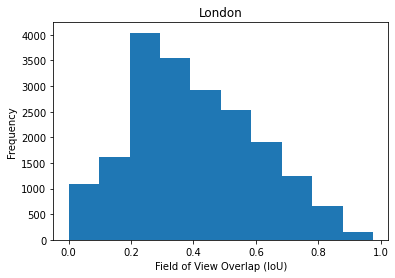

In [78]:
a = [i[1] for i in list(data.values())]
a = sum(a, [])

plt.hist(a)
plt.title('London')
plt.xlabel('Field of View Overlap (IoU)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

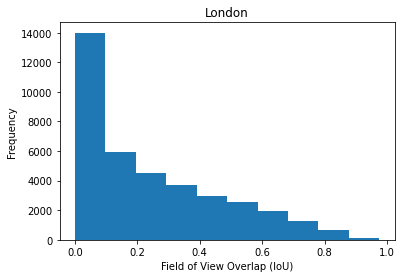

In [33]:
plt.hist(a)
plt.title('London')
plt.xlabel('Field of View Overlap (IoU)')
plt.ylabel('Frequency')

In [5]:


dataset_path = '/Users/alexanderholstrup/Desktop/datasets/tuples/val'
#qvecs = torch.from_numpy(np.loadtxt(f'{dataset_path}/qvecs.txt', delimiter=','))
#poolvecs = torch.from_numpy(np.loadtxt(f'{dataset_path}/poolvecs.txt', delimiter=','))

qpool = torch.from_numpy(np.loadtxt(
        f'{dataset_path}/qpool.txt', delimiter=','))
ppool = torch.from_numpy(np.loadtxt(
        f'{dataset_path}/ppool.txt', delimiter=','))

qcoordinates = torch.from_numpy(np.loadtxt(
        f'{dataset_path}/qcoordinates.txt', delimiter=','))
pcoordinates = torch.from_numpy(np.loadtxt(
        f'{dataset_path}/dbcoordinates.txt', delimiter=','))
    
qimages = pd.read_csv(f'{dataset_path}/qImages.txt', delimiter=',', header=None)
dbimages = pd.read_csv(f'{dataset_path}/dbImages.txt', delimiter=',', header=None)


In [41]:
i = 203
q = qpool[i]
ps = ppool[i][ppool[i] != -1]
print(q, ps)

tensor(207., dtype=torch.float64) tensor([5411., 5412., 5413., 5414., 5415.], dtype=torch.float64)


In [42]:
def convert_path(idx):
    return f'{root}/{idx[5:]}'

data/train_val/sf/query/images/UpJH9Zi6zpSSH6fsSHOeTA.jpg


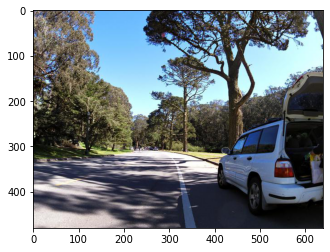

data/train_val/sf/database/images/4ewxSZcBoM9u1HIvlAB8zg.jpg


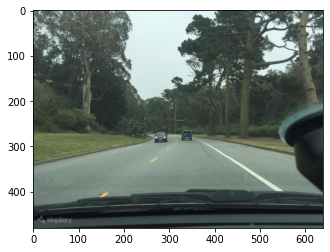

data/train_val/sf/database/images/U37XddFKX9PtLG1VHAoVeg.jpg


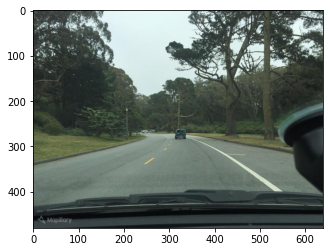

data/train_val/sf/database/images/G90c1BXo_L7hEYLUly0bnA.jpg


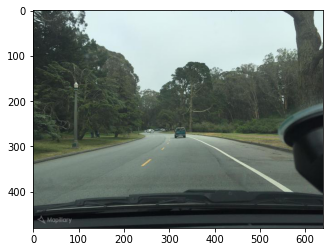

data/train_val/sf/database/images/Pz33AdMpA8Zj-fwOwtX__Q.jpg


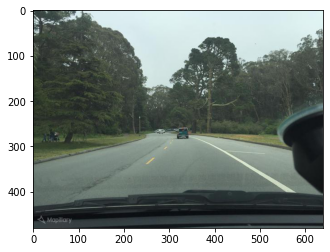

data/train_val/sf/database/images/HHHqtSpdMIgZQwC55n_7FQ.jpg


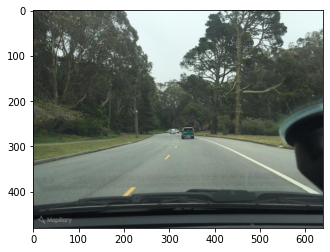

In [43]:
qimages.iloc[[q]]
print(qimages.iloc[[q]].values[0][0])


pil_im = Image.open(convert_path(qimages.iloc[[q]].values[0][0]), 'r')
plt.imshow(np.asarray(pil_im))
plt.show()
for p in ps[0:10]:
    idx = dbimages.iloc[[p]].values[0][0]
    pil_im = Image.open(convert_path(idx), 'r')
    plt.imshow(np.asarray(pil_im))
    print(idx)
    plt.show()